Fit parameters: 2.7513e-06 . PHI ^ 5.9017e+00


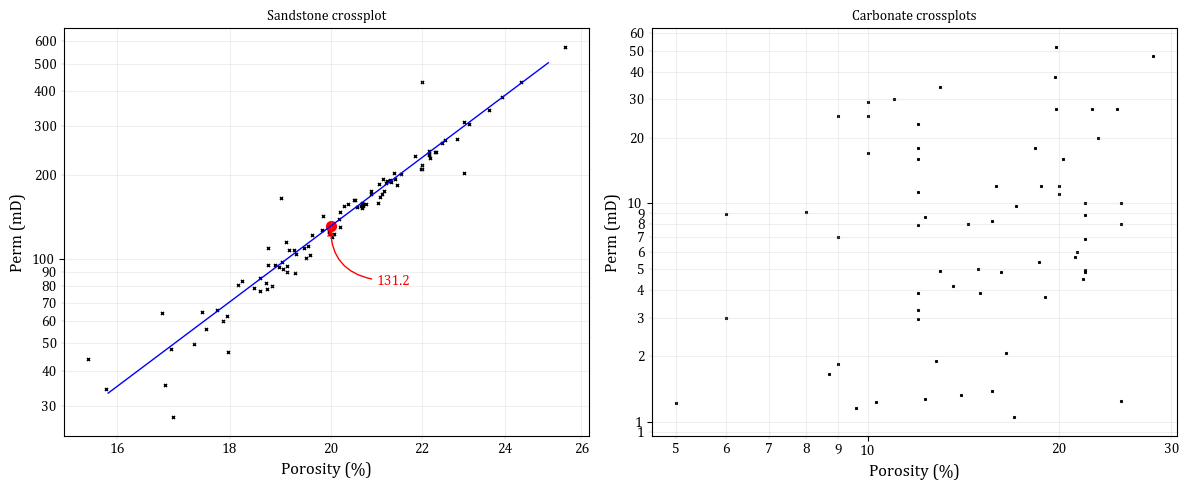

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

df = pd.read_excel("SandstoneData_HW1.xlsx")
df["POR%"] = df.POR * 100

# Makes a regression
from scipy.optimize import curve_fit
def expFoo(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(expFoo, df["POR%"], df.PERM)
print(f"Fit parameters: {popt[0]:.4e} . PHI ^ {popt[1]:.4e}")
perm_at_por20 = expFoo([20], *popt)

fig, [ax_ss, ax_cb] = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax=ax_ss
df.plot.scatter("POR%", "PERM", marker='x', color='k', s=5, ax=ax)

# Plot curve fit
newX = np.logspace(1.2, 1.4, base=10)
ax.plot(newX, expFoo(newX, *popt))
# Plot point por = 20%
ax.scatter(20, perm_at_por20, marker='o', color='red', s=50)

x = 20
y = perm_at_por20[0]
ax.annotate(f"%.1f" % y, (x,y), xytext=(x+1, y-50), color="r",
    arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color="r"))


ax.set_title("Sandstone crossplot")
ax.set_ylabel("Perm (mD)")
ax.set_xlabel("Porosity (%)")

ax.set_xscale('log')
ax.set_yscale('log')

from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_minor_formatter(FormatStrFormatter('%0.0f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter("%0.0f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.0f"))

#
# CARBONATE DATA
# 

df = pd.read_excel("CarbonateData_HW1.xlsx")
df["POR%"] = df.POR

ax = ax_cb
df.plot.scatter("POR%", "PERM", marker='x', color='k', s=3, ax=ax)

ax.set_title("Carbonate crossplots")
ax.set_ylabel("Perm (mD)")
ax.set_xlabel("Porosity (%)")

ax.set_xscale('log')
ax.set_yscale('log')

from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_minor_formatter(FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter("%0.0f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.0f"))

#
# Export
#
fig.tight_layout()
fig.savefig("por_vs_perm.svg")

array([10.        , 10.23773966, 10.48113134, 10.73030941, 10.98541142,
       11.24657822, 11.51395399, 11.78768635, 12.06792641, 12.35482888,
       12.64855217, 12.94925842, 13.25711366, 13.57228783, 13.89495494,
       14.22529313, 14.56348478, 14.90971657, 15.26417967, 15.62706977,
       15.9985872 , 16.37893707, 16.76832937, 17.16697907, 17.57510625,
       17.99293623, 18.42069969, 18.85863279, 19.30697729, 19.76598072,
       20.23589648, 20.716984  , 21.20950888, 21.71374303, 22.22996483,
       22.75845926, 23.29951811, 23.85344006, 24.42053095, 25.00110383,
       25.59547923, 26.20398529, 26.82695795, 27.46474115, 28.11768698,
       28.78615592, 29.47051703, 30.17114811, 30.88843596, 31.6227766 ])